# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import torch
from torch import nn

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

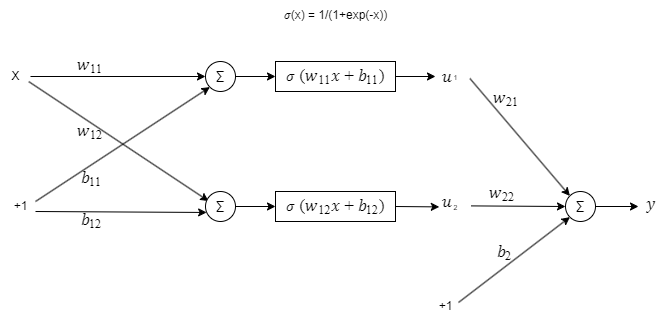

Обучаемыми параметрами являются $w_{11},w_{12},b_{11},b_{12},w_{21},w_{22},b_{2}$. Всего $7$ обучаемых параметров.

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; \frac{2}{n} \big(\widehat{y}(X_i) - Y_i\big).$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; u_h(X_i).$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; 1.$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; w_{2h}.$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; \frac{\exp(-x)}{(1 + \exp(-x))^{2}} = \; \frac{1 - \sigma(x)}{\sigma(x)} \cdot \sigma^{2}(x) = \; (1 - \sigma(x)) \cdot \sigma(x).$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; X_i \cdot \frac{\exp((-1)\cdot (w_{1h}\cdot X_i + b_{1h}))}{(1 + \exp((-1)\cdot (w_{1h}\cdot X_i + b_{1h})))^{2}} = \; X_i \cdot (1 - \sigma(w_{1h}\cdot X_i + b_{1h})) \cdot \sigma(w_{1h}\cdot X_i + b_{1h}).$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; \frac{\exp((-1)\cdot (w_{1h}\cdot X_i + b_{1h}))}{(1 + \exp((-1)\cdot (w_{1h}\cdot X_i + b_{1h})))^{2}} = \; (1 - \sigma(w_{1h}\cdot X_i + b_{1h})) \cdot \sigma(w_{1h}\cdot X_i + b_{1h}).$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Будем использовать метод градиентного спуска, так как при очень большой выборке мы не сможем быстро посчитать оптимальные значения параметров. 

**Вывод:**
С помощью метода обратного распространения ошибки (backpropagation) и градиентного спуска можно найти параметры нейронной сети для минимизации функции ошибки $L(X, Y)$ на заданном наборе данных с хорошей точностью.

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [3]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = X * X + 5 * X + 3
y = y.reshape(sample_size)
X = X.reshape(sample_size)
assert y.shape == (sample_size,)

Разделим данные на тестовую и обучающую выборки.

In [4]:
data = pd.DataFrame({"X":X, "y": y})
train, test = train_test_split(data, test_size=0.2, random_state=42)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`.

In [5]:
model = LinearRegression(fit_intercept=True)  # объявляем модель, основанную на линейной регрессии
model.fit(train[["X"]], train["y"])  # обучаем
print("Оценка коэффициента, полученного при использовании простой линейной регрессии:")
print(model.coef_) # смотрим на коэффициент перед X
print("Свободный коэффициент, полученный при использовании простой линейной регрессии:")
print(model.intercept_) # смотрим на свободный коэффициент

Оценка коэффициента, полученного при использовании простой линейной регрессии:
[4.99835858]
Свободный коэффициент, полученный при использовании простой линейной регрессии:
3.998797546796794


Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

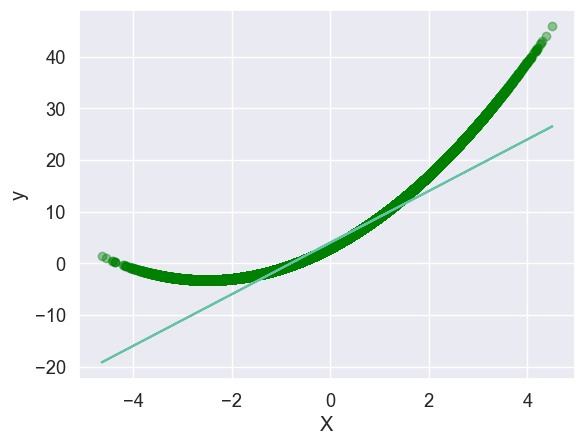

In [6]:
fig, ax = plt.subplots()
plt.scatter(train["X"], train["y"], c='g', alpha=0.4)
plt.plot(train["X"], model.coef_ * train["X"] + model.intercept_)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

In [7]:
# Выполним предсказание построенной ранее моделью, использующей линейную регрессию
test_preds = model.predict(test[["X"]])
# Посчитаем MSE на тестовой части данных для линейной регрессии
print('метрика MSE:')
print(((test["y"] - test_preds) ** 2).mean())

метрика MSE:
1.9914693799336822


Повторите вычисления для другой нелинейной функции $y(x)$.

**Вывод:** Использование нейронной сети позволило построить прогноз, который лучше по метрике MSE, чем прогноз, построенный с использованием линейной регрессии.

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [8]:
# собираем модули в последовательность
neural_model = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном 2
    nn.Linear(in_features=1, out_features=2), 
    # та же ф-ция активации, что и раньше, только из pytorch 
    nn.Sigmoid(),  
    # кол-во признаков во входном слое 2, в выходном 1
    nn.Linear(in_features=2, out_features=1)  
)

neural_model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

Преобразуем данные.

In [9]:
X_tensor = torch.FloatTensor(train["X"].values)
y_tensor = torch.FloatTensor(train["y"].values)
X_new = X_tensor.reshape(-1, 1)
y_new = y_tensor.reshape(-1, 1)

Посмотрим на параметры модели:

In [10]:
for name, param in neural_model.named_parameters():
    print(name)
    print(param.data)

0.weight
tensor([[-0.0526],
        [-0.6911]])
0.bias
tensor([0.3718, 0.6525])
2.weight
tensor([[-0.4356,  0.1802]])
2.bias
tensor([0.1939])


Видим, что в модели всего $7$ обучаемых параметров, как и получилось в задании $1$.

Функция визуализации процесса обучения:

In [11]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.
    
    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Избавимся от градиентов перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число, для красивого отображения
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5, alpha=0.75)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('График y(x)')
    plt.show()

    print(f"MSE = {loss:.3f}")

Установим скорость обучения на уровне 0.2 для всех параметров сразу. Используем оптимизатор, реализующий стохастический градиентный спуск.

In [12]:
optimizer = torch.optim.SGD(neural_model.parameters(), lr=0.2)
optim_func = nn.MSELoss()

Обучим полученную модель на наших данных.

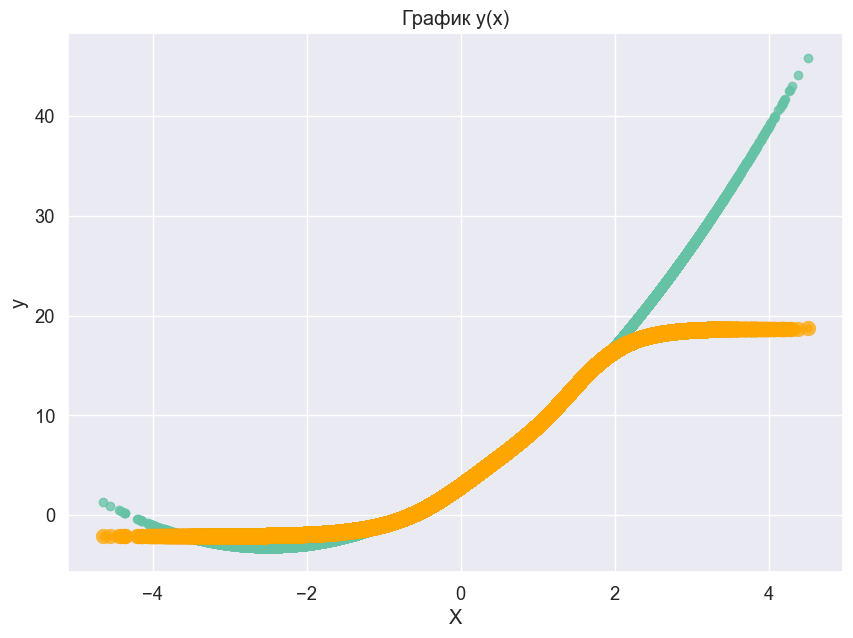

MSE = 0.485
Готово!


In [13]:
# Количество итераций
num_iter = 10000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = neural_model(X_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции 
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего 
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(X_tensor, y_tensor, y_pred, loss)
        
        if loss.item() < 0.5:
            print("Готово!")
            break


**Вывод:**
На практике нейронные сети удобно писать с использованием готовых модулей. Использование нейронной сети позволило построить прогноз, который намного лучше по метрике MSE, чем прогноз, построенный с использованием линейной регрессии.